In [ ]:
# Inicialmente importamos las bibliotecas necesarias.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import requests
import urllib.request
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from urllib.request import urlopen
import csv
import pandas as pd

In [17]:
# creamos una variable para almacenar el enlace de la pagina.
url = "https://www.culturagenial.com/es/cien-anos-de-soledad-de-gabriel-garcia-marquez/'"
# preparamos los datos, utilizamos la funcion requests.get()
req = requests.get(url)
#ahora que tenemos los datos preparados, vamos extraer los datos o el codigo HTML de la pagina web con la función BeautifulSoup()
soup = BeautifulSoup(req.text)
text = soup.get_text(strip=True)
# la variable tokens contendrá una lista de palabras individuales extraídas del texto en español.
tokens = word_tokenize(text, language='spanish')

In [18]:
# Está filtrando las palabras de la lista para asegurarse de que solo se incluyan aquellas que consisten únicamente en caracteres alfabéticos.
tokens = [word.lower() for word in tokens if word.isalpha()]
print(tokens)

['cien', 'años', 'de', 'soledad', 'de', 'garcía', 'márquez', 'resumen', 'y', 'análisis', 'cultura', 'genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases', 'y', 'discursosartes', 'visualesmúsicaseriesperiodos', 'y', 'movimientoscultura', 'genialliteraturacien', 'años', 'de', 'soledad', 'de', 'garcía', 'márquez', 'resumen', 'y', 'análisisrevisado', 'porcatalina', 'arancibia', 'duránmáster', 'en', 'literatura', 'española', 'e', 'hispanoamericanacien', 'años', 'de', 'soledadse', 'ha', 'convertido', 'en', 'la', 'novela', 'más', 'emblemática', 'de', 'la', 'literatura', 'latinoamericana', 'escrita', 'por', 'gabriel', 'garcía', 'márquez', 'esta', 'obra', 'se', 'inscribió', 'en', 'lo', 'que', 'para', 'unos', 'es', 'realismo', 'mágico', 'y', 'para', 'alejo', 'carpentier', 'es', 'lo', 'real', 'maravilloso', 'un', 'exhaustivo', 'trabajo', 'de', 'imaginación', 'narra', 'la', 'historia', 'de', 'siete', 'generaciones', 'de', 'la', 

In [28]:
# función para verificar secuencias de palabras
def verificar_secuencia(tokens, secuencia):
    for i in range(len(tokens) - len(secuencia) + 1):
        sublista = tokens[i:i + len(secuencia)]
        if sublista == secuencia:
            return True
    return False

# ejemplo de uso de la función
secuencia_a_verificar = ["gabriel", "garcía", "márquez"]
resultado = verificar_secuencia(tokens, secuencia_a_verificar)

print(f"¿La secuencia '{' '.join(secuencia_a_verificar)}' está presente? {resultado}")


¿La secuencia 'gabriel garcía márquez' está presente? True


In [29]:
# frecuencia de palabras (o Frecuencia de Distribución, en inglés "FreqDist") es una herramienta útil para contar la frecuencia de cada palabra en un conjunto de tokens.
fp = nltk.FreqDist(tokens)
for key,val in fp.items():
    print (str(key) + ':' + str(val))

cien:5
años:21
de:152
soledad:9
garcía:16
márquez:10
resumen:7
y:76
análisis:2
cultura:4
genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases:1
discursosartes:1
visualesmúsicaseriesperiodos:1
movimientoscultura:1
genialliteraturacien:1
análisisrevisado:1
porcatalina:2
arancibia:2
duránmáster:2
en:53
literatura:6
española:2
e:3
hispanoamericanacien:1
soledadse:1
ha:5
convertido:1
la:76
novela:8
más:11
emblemática:1
latinoamericana:1
escrita:1
por:20
gabriel:10
esta:6
obra:2
se:30
inscribió:1
lo:14
que:41
para:12
unos:3
es:15
realismo:2
mágico:3
alejo:2
carpentier:2
real:3
maravilloso:3
un:31
exhaustivo:1
trabajo:1
imaginación:1
narra:1
historia:8
siete:1
generaciones:1
familia:6
buendía:10
condenados:1
a:46
decien:3
soledadla:1
está:2
estructurada:1
capítulos:1
sin:3
nombrar:1
embargo:1
facilitar:1
comprensión:1
del:30
argumento:1
hemos:1
ordenado:1
separado:1
el:60
relato:4
cuatro:1
etapas:1
identifican:1
grandes:1
ra

rss:1


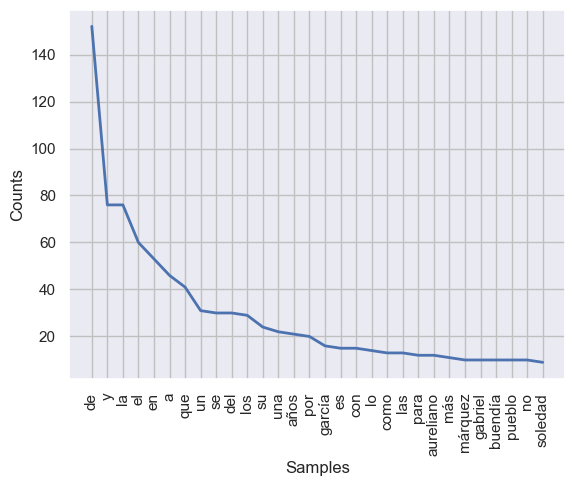

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
# graficamos las frecuencia de las palabras del objeto tokens.
print(str(key) + ':' + str(val))
sns.set()
fp.plot(30, cumulative=False)

In [50]:
#eliminar las stop words (palabras de paro o palabras vacías) del conjunto de tokens.
stop_words = set(stopwords.words('spanish'))
clean_tokens = [word for word in tokens if word not in stop_words]
print(clean_tokens)

['cien', 'años', 'soledad', 'garcía', 'márquez', 'resumen', 'análisis', 'cultura', 'genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases', 'discursosartes', 'visualesmúsicaseriesperiodos', 'movimientoscultura', 'genialliteraturacien', 'años', 'soledad', 'garcía', 'márquez', 'resumen', 'análisisrevisado', 'porcatalina', 'arancibia', 'duránmáster', 'literatura', 'española', 'hispanoamericanacien', 'años', 'soledadse', 'convertido', 'novela', 'emblemática', 'literatura', 'latinoamericana', 'escrita', 'gabriel', 'garcía', 'márquez', 'obra', 'inscribió', 'realismo', 'mágico', 'alejo', 'carpentier', 'real', 'maravilloso', 'exhaustivo', 'trabajo', 'imaginación', 'narra', 'historia', 'siete', 'generaciones', 'familia', 'buendía', 'condenados', 'decien', 'años', 'soledadla', 'novela', 'estructurada', 'capítulos', 'nombrar', 'embargo', 'facilitar', 'comprensión', 'argumento', 'ordenado', 'separado', 'relato', 'cuatro', 'etapas'

In [33]:
# graficamos las frecuencia de las palabras del objeto tokens eliminando los stop words.
freq_clean = nltk.FreqDist(clean_tokens)
for key,val in freq_clean.items() :
    print(str(key) + ':' + str(val))

cien:5
años:21
soledad:9
garcía:16
márquez:10
resumen:7
análisis:2
cultura:4
genialliteraturaarquitecturapinturacinefilosofíacategoríasliteraturaarquitecturapinturacinefilosofíaesculturapoesíafrases:1
discursosartes:1
visualesmúsicaseriesperiodos:1
movimientoscultura:1
genialliteraturacien:1
análisisrevisado:1
porcatalina:2
arancibia:2
duránmáster:2
literatura:6
española:2
hispanoamericanacien:1
soledadse:1
convertido:1
novela:8
emblemática:1
latinoamericana:1
escrita:1
gabriel:10
obra:2
inscribió:1
realismo:2
mágico:3
alejo:2
carpentier:2
real:3
maravilloso:3
exhaustivo:1
trabajo:1
imaginación:1
narra:1
historia:8
siete:1
generaciones:1
familia:6
buendía:10
condenados:1
decien:3
soledadla:1
estructurada:1
capítulos:1
nombrar:1
embargo:1
facilitar:1
comprensión:1
argumento:1
ordenado:1
separado:1
relato:4
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
pasajes:1
etapa:4
fundación:1
primeros:1
macondodesde:1
úrsula:5
iguarán:1
casó:1
primo:1
josé:9
arcadio:8
teme:1
engendrar:1
niño:4

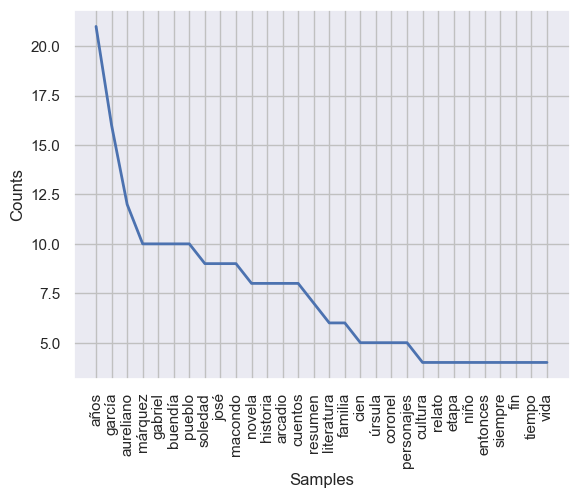

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
# graficamos de nuevo para observar nustras frecuencias
sns.set()
freq_clean.plot(30, cumulative=False)

In [38]:
# Para encontrar sinónimos de palabras utilizando WordNet en NLTK y asociar sinónimos a palabras específicas encontradas en el texto.
def obtener_sinonimos(palabra):
    sinonimos = []
    for syn in wordnet.synsets(palabra):
        for lemma in syn.lemmas():
            sinonimos.append(lemma.name())
    return list(set(sinonimos))  # Convertir a conjunto y luego a lista para eliminar duplicados

# Ejemplo de uso:
palabra_ejemplo = "family"
sinonimos_palabra_ejemplo = obtener_sinonimos(palabra_ejemplo)
print(f"Sinónimos de '{palabra_ejemplo}': {sinonimos_palabra_ejemplo}")

Sinónimos de 'family': ['mob', 'family_line', 'class', 'sept', 'crime_syndicate', 'house', 'folk', 'kin', 'menage', 'family_unit', 'category', 'fellowship', 'phratry', 'kinsfolk', 'kinfolk', 'kinsperson', 'syndicate', 'home', 'family', 'household']


In [49]:
# Supongamos que 'clean_tokens' es la lista de tokens después de eliminar stop words

for palabra in clean_tokens:
    sinonimos = obtener_sinonimos(palabra)
    if sinonimos:
        print(f"Palabra: {palabra}, Sinónimos: {', '.join(sinonimos)}")

Palabra: soledad, Sinónimos: Soledad
Palabra: soledad, Sinónimos: Soledad
Palabra: gabriel, Sinónimos: Gabriel
Palabra: real, Sinónimos: rattling, very, material, really, actual, tangible, genuine, real_number, substantial, real, existent, literal, veridical
Palabra: embargo, Sinónimos: trade_stoppage, embargo, trade_embargo
Palabra: primo, Sinónimos: primo
Palabra: cola, Sinónimos: Costa_Rican_colon, colon, genus_Cola, El_Salvadoran_colon, Cola, Aspinwall, Colon, cola, dope
Palabra: honor, Sinónimos: honor, abide_by, reward, accolade, award, laurels, purity, pureness, observe, honour, respect
Palabra: hombre, Sinónimos: bozo, hombre, cat, guy
Palabra: decide, Sinónimos: resolve, determine, make_up_one's_mind, decide, adjudicate, settle
Palabra: selva, Sinónimos: selva, tropical_rain_forest
Palabra: pueblo, Sinónimos: Pueblo, pueblo
Palabra: pueblo, Sinónimos: Pueblo, pueblo
Palabra: gitanos, Sinónimos: gitano
Palabra: pone, Sinónimos: cornpone, pone
Palabra: fin, Sinónimos: quintet, P